In [59]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, iradon

import scipy

import matplotlib.pyplot as plt
import numpy as np

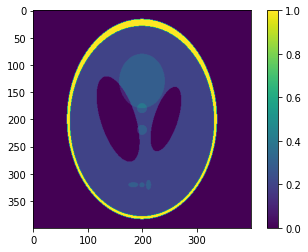

In [6]:
image = shepp_logan_phantom()
#image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)

plt.imshow(image)
plt.colorbar()

(160, 160)


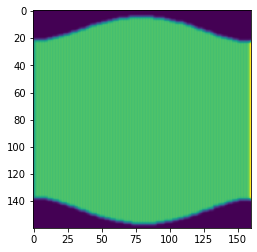

In [77]:
image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect')
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

# Suppose we lost every even degree's sample:
for i in range(160):
    if i%2==0:
        sinogram[:,i] = 0

#sinogram[:,6:30] = 0
#sinogram[:,130:150] = 0

# Get rid of frequency detail because we ONLY care about the boundary:
sinogram[sinogram != 0] = 1

# Smooth the image
sinogram = scipy.ndimage.gaussian_filter(sinogram, 1)

# Threshold so it is still a mask:
#sinogram[sinogram < 0.5] = 0
#sinogram[sinogram >= 0.5] = 1

print(np.shape(sinogram))
plt.imshow(sinogram)

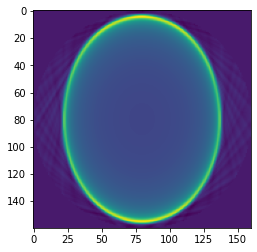

In [78]:
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')

plt.imshow(reconstruction_fbp)